# <center>Relatório Teste AB</center>

##### Autores: Henry Dorta Stevanato de Brito e Henrique Almeida Lucareli.

### Introdução
##### Neste teste, elaboramos dois layouts diferentes para o nosso aplicativo, denominados Teste A e Teste B, com o objetivo de analisar a experiência e a preferência dos usuários em relação à interatividade e usabilidade. Ambos os protótipos foram desenvolvidos com foco na clareza visual, facilidade de navegação e engajamento do usuário.


### Importações:

In [290]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pingouin as pg

### Leitura das bases:

In [291]:
teste_a = pd.read_excel('TesteAB_Recoope.xlsx',sheet_name='Teste A')
teste_b = pd.read_excel('TesteAB_Recoope.xlsx',sheet_name='Teste B')
teste_ab = pd.read_excel('TesteAB_Recoope.xlsx',sheet_name='Teste A e B')
display(teste_a)
display(teste_b)
display(teste_ab)

,Teste A
0,220.00
1,400.00
2,54.00
3,90.00
4,389.00
5,51.00
6,231.24
7,104.53
8,82.74
9,68.98


,Teste B
0,90.67
1,13.40
2,203.62
3,84.69
4,33.01
5,32.80
6,29.46
7,34.46
8,53.81
9,182.53


,Teste AB
0,220.00
1,400.00
2,54.00
3,90.00
4,389.00
5,51.00
6,231.24
7,104.53
8,82.74
9,68.98


### Calculo do t-student utilizando a biblioteca ->Scipy<-:

#### H0 = µB ⩾ µA
#### H1 = µB < µA

##### Caso o valor de T esteja dentro da área delimitada, recusaremos a hipótese 0 (H0), mas se ele estiver fora recusaremos a hipótese 1 (H1)

Média de teste_a: 169.149
Média de teste_b: 75.845
Estatística t: 1.9637758031435937
Valor p: 0.03259626698758916
A interface B demonstra indícios de ser inferior a A (rejeita H0).
Grau de liberdade (df): 18
Valor crítico t (exibido como positivo): 1.734063606617536


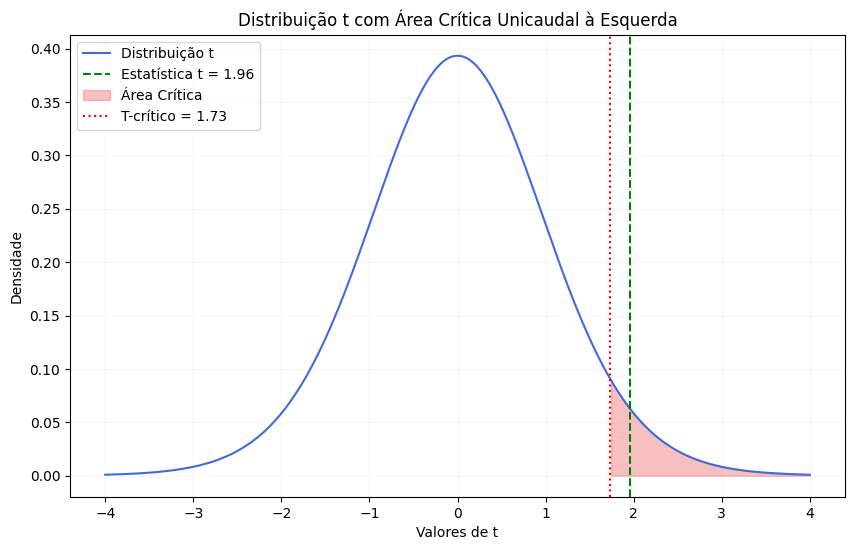

In [292]:
# Calculando a média das amostras
print("Média de teste_a:", np.mean(teste_a['Teste A']))
print("Média de teste_b:", np.mean(teste_b['Teste B']))

# Realizando o teste t para duas amostras independentes (testando se média de teste_b < média de teste_a)
stat, p_value = stats.ttest_ind(teste_b['Teste B'], teste_a['Teste A'], alternative='less')

stat = abs(stat)
print("Estatística t:", stat)
print("Valor p:", p_value)

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("A interface B demonstra indícios de ser inferior a A (rejeita H0).")
else:
    print("Não há evidências suficientes para afirmar que a interface B é inferior a A (não rejeita H0).")

# Realizando o teste t com Pingouin
result = pg.ttest(teste_a['Teste A'], teste_b['Teste B'], paired=False, alternative='less')

# Extraindo o grau de liberdade
df = result['dof'].values[0]

# Exibindo os resultados
print("Grau de liberdade (df):", df)

# Calculando o valor crítico t para uma cauda à esquerda e convertendo-o para positivo
t_critical = abs(stats.t.ppf(alpha, df))

# Exibindo o valor crítico
print("Valor crítico t (exibido como positivo):", t_critical)

# Criando os valores para a distribuição t
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t', color='royalblue')
plt.axvline(stat, color='green', linestyle='--', label=f'Estatística t = {stat:.2f}')
plt.fill_between(x, 0, y, where=(x >= t_critical), color='lightcoral', alpha=0.5, label=f'Área Crítica')
plt.axvline(t_critical, color='red', linestyle=':', label=f'T-crítico = {t_critical:.2f}')

# Personalização do gráfico
plt.title('Distribuição t com Área Crítica Unicaudal à Esquerda')
plt.xlabel('Valores de t')
plt.ylabel('Densidade')
plt.legend(loc='upper left')

# Diminuindo a opacidade da grade
plt.grid(True, alpha=0.08)  # Ajuste o valor de alpha conforme desejado

# Exibir o gráfico
plt.show()

##### Após calcularmos seguindo as hipóteses acima, chagamos à conclusão de que temos fortes indícios que a interface B é melhor que a interface A. Depois de análisar os dados dos testes, percebemos que haviam dois dados muito descrepantes em relação aos demais localizados no teste A.

#### Aqui, podemos perceber que os dados do teste A tem uma leve concentração entre 50 e 105 segundos, já os outros estão dispersos. Podemos reparar também, que há dois dados extremamente afastados, esses são os dados descrepantes, podendo ser considerados quase outliers.

In [293]:
fig = px.box(teste_a,x='Teste A',points='all',title='Dados do teste A')
fig.show()

##### Nestes gráficos, podemos observar os dados dos testes A e B ao mesmo tempo. Agora, os dados de A não parecem muito dispersos, porém, aqueles dois continuam extremamente afastados.

In [294]:
coluna_valores_a = teste_a.columns[0]
coluna_valores_b = teste_b.columns[0]

df = pd.DataFrame({
    'Valores': pd.concat([teste_a[coluna_valores_a], teste_b[coluna_valores_b]], ignore_index=True),
    'Teste': ['Teste A'] * len(teste_a) + ['Teste B'] * len(teste_b)
})

fig = px.box(df, x='Valores', y='Teste', color='Teste', points='all',title='Comparação dos dados A e B')
fig.show()

fig = px.box(teste_ab,x='Teste AB',points='all',title='Junção dos dados A e B')
fig.show()

#### Para melhor compreensão do nosso teste, decidimos retirar esses quase outliers e realizar o calculo novemente.

### Retirando os outliers:

In [295]:
teste_a['Teste A'] = teste_a[teste_a['Teste A'] != 400]
teste_a['Teste A'] = teste_a[teste_a['Teste A'] != 389]
teste_a = teste_a.dropna()
display(teste_a[['Teste A']])

teste_ab['Teste AB'] = teste_ab[teste_ab['Teste AB'] != 400]
teste_ab['Teste AB'] = teste_ab[teste_ab['Teste AB'] != 389]
teste_ab = teste_ab.dropna()
display(teste_ab[['Teste AB']])

,Teste A
0,220.00
2,54.00
3,90.00
5,51.00
6,231.24
7,104.53
8,82.74
9,68.98


,Teste AB
0,220.00
2,54.00
3,90.00
5,51.00
6,231.24
7,104.53
8,82.74
9,68.98
10,90.67
11,13.40


#### Após a retirada dos dados descrepantes, podemos identificar que a dispersão dos dados do teste A foi reduzida.

In [296]:
fig = px.box(teste_a,x='Teste A',points='all',title='Dados do teste A')
fig.show()

#### Os dados de A e B tornaram-se mais concisos. Surgiram outliers; porém, esses valores, embora sejam considerados extremos, são esperados, pois se comportam de forma consistente com os demais dados.

In [297]:
coluna_valores_a = teste_a.columns[0]
coluna_valores_b = teste_b.columns[0]

df = pd.DataFrame({
    'Valores': pd.concat([teste_a[coluna_valores_a], teste_b[coluna_valores_b]], ignore_index=True),
    'Teste': ['Teste A'] * len(teste_a) + ['Teste B'] * len(teste_b)
})

fig = px.box(df, x='Valores', y='Teste', color='Teste', points='all',title='Comparação dos dados A e B')
fig.show()

fig = px.box(teste_ab,x='Teste AB',points='all',title='Junção dos dados A e B')
fig.show()

### Refazendo o calculo do t-student seguindo as mesmas hipóteses:

Média de teste_a: 112.81125
Média de teste_b: 75.845
Estatística t: 1.1296254466509925
Valor p: 0.13764278631324617
Não há evidências suficientes para afirmar que a interface B é inferior a A (não rejeita H0).
Grau de liberdade (df): 14.568881772116212
Valor crítico t (exibido como positivo): 1.7564632461899532


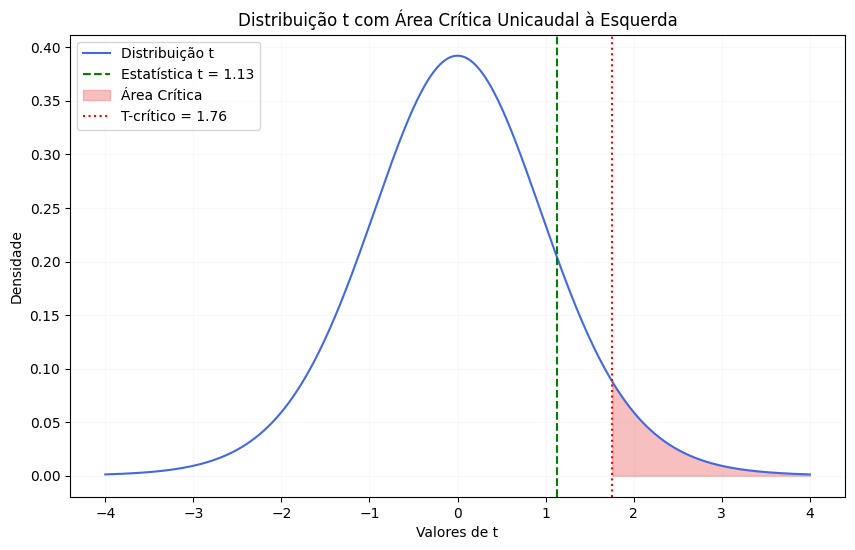

In [298]:
# Calculando a média das amostras
print("Média de teste_a:", np.mean(teste_a['Teste A']))
print("Média de teste_b:", np.mean(teste_b['Teste B']))

# Realizando o teste t para duas amostras independentes (testando se média de teste_b < média de teste_a)
stat, p_value = stats.ttest_ind(teste_b['Teste B'], teste_a['Teste A'], alternative='less')

stat = abs(stat)
print("Estatística t:", stat)
print("Valor p:", p_value)

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("A interface B demonstra indícios de ser inferior a A (rejeita H0).")
else:
    print("Não há evidências suficientes para afirmar que a interface B é inferior a A (não rejeita H0).")

# Realizando o teste t com Pingouin
result = pg.ttest(teste_a['Teste A'], teste_b['Teste B'], paired=False, alternative='less')

# Extraindo o grau de liberdade
df = result['dof'].values[0]

# Exibindo os resultados
print("Grau de liberdade (df):", df)

# Calculando o valor crítico t para uma cauda à esquerda e convertendo-o para positivo
t_critical = abs(stats.t.ppf(alpha, df))

# Exibindo o valor crítico
print("Valor crítico t (exibido como positivo):", t_critical)

# Criando os valores para a distribuição t
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t', color='royalblue')
plt.axvline(stat, color='green', linestyle='--', label=f'Estatística t = {stat:.2f}')
plt.fill_between(x, 0, y, where=(x >= t_critical), color='lightcoral', alpha=0.5, label=f'Área Crítica')
plt.axvline(t_critical, color='red', linestyle=':', label=f'T-crítico = {t_critical:.2f}')

# Personalização do gráfico
plt.title('Distribuição t com Área Crítica Unicaudal à Esquerda')
plt.xlabel('Valores de t')
plt.ylabel('Densidade')
plt.legend(loc='upper left')

# Diminuindo a opacidade da grade
plt.grid(True, alpha=0.08)  # Ajuste o valor de alpha conforme desejado

# Exibir o gráfico
plt.show()

#### O resultado alterou!!!
#### Agora possuimos fortes indicios de que a interface B não é melhor que A, ele tem forte tendência para ter a mesma efetividade ou ser inferior.

### Conclusão
##### Com esse teste, podemos concluir que, a interface B tem forte probabilidade de ser melhor que a interface A, porém esse resultado está possivelmente enviesado, pois há dois dados descrepantes que acabaram afetando o resultado do Teste A, logo não podemos ter plena confiança nos resultados desse teste.